<a href="https://colab.research.google.com/github/ashutosh-2380/Lung-Disease-Detection/blob/main/Lung_Disease_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [21]:
!chmod 600 /root/.kaggle/kaggle.json

In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/lung-disease.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [5]:
train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/Lung X-Ray Image/Lung X-Ray Image',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256),
    validation_split=0.2,
    subset="training",
    seed=123
)

val_ds = keras.utils.image_dataset_from_directory(
    directory='/content/Lung X-Ray Image/Lung X-Ray Image',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256),
    validation_split=0.2,
    subset="validation",
    seed=123
)


Found 3475 files belonging to 3 classes.
Using 2780 files for training.
Found 3475 files belonging to 3 classes.
Using 695 files for validation.


In [6]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
val_ds = val_ds.map(process)

In [9]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(256,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_25 (Ba  (None, 254, 254, 32)      128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 127, 127, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_26 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_26 (Ba  (None, 125, 125, 64)      256       
 tchNormalization)                                               
                                                      

In [10]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [11]:
history = model.fit(train_ds,epochs=40,validation_data=val_ds)

Epoch 1/40
87/87 [==============================] - 55s 405ms/step - loss: 0.7889 - accuracy: 0.7036 - val_loss: 1.5893 - val_accuracy: 0.3165
Epoch 2/40
87/87 [==============================] - 24s 274ms/step - loss: 0.5560 - accuracy: 0.7820 - val_loss: 3.2628 - val_accuracy: 0.3151
Epoch 3/40
87/87 [==============================] - 24s 274ms/step - loss: 0.4417 - accuracy: 0.8241 - val_loss: 1.9326 - val_accuracy: 0.3597
Epoch 4/40
87/87 [==============================] - 24s 272ms/step - loss: 0.4080 - accuracy: 0.8392 - val_loss: 1.0599 - val_accuracy: 0.6748
Epoch 5/40
87/87 [==============================] - 24s 271ms/step - loss: 0.3783 - accuracy: 0.8493 - val_loss: 0.5561 - val_accuracy: 0.8072
Epoch 6/40
87/87 [==============================] - 24s 277ms/step - loss: 0.3557 - accuracy: 0.8615 - val_loss: 0.7536 - val_accuracy: 0.7266
Epoch 7/40
87/87 [==============================] - 24s 269ms/step - loss: 0.3432 - accuracy: 0.8626 - val_loss: 0.3742 - val_accuracy: 0.8619

In [12]:
import matplotlib.pyplot as plt

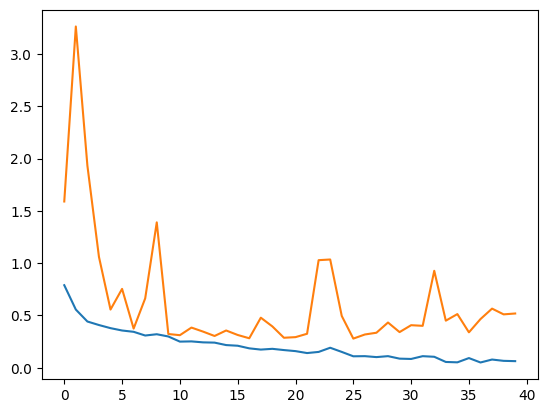

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

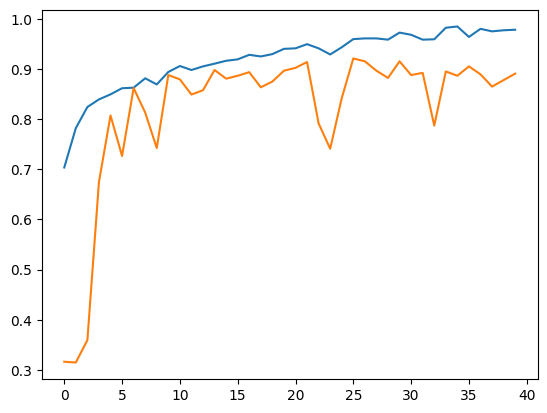

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])